# Particle in a Sphere

## Statement of the Problem

## The Hamiltonian

## Spherical Polar Coordinates


$\nabla^2_{r\theta\phi} = \frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) + \frac{1}{r^2\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{r^2\sin^2\theta}\frac{\partial^2}{\partial^2\phi}$

## Separtion of Variables in Spherical Coordinates

The Schrodinger equation in spherical polar coordinates is

$ -\frac{\hbar^2}{2m}\left[\frac{1}{r^2}\frac{\partial}{\partial r}\left(r^2\frac{\partial}{\partial r}\right) + \frac{1}{r^2\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{r^2\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right] \psi(r,\theta,\phi) = E \psi(r,\theta,\phi)$.

Note that since $r$ does not change (bond doesn't vibrate), we can write $\psi(r_0,\theta,\phi) = BY(\theta,\phi)$ where $B$ is a constant.  We will thus try and solve for functions $Y(\theta,\phi)$. Also, all $\frac{\partial}{\partial r}$ terms go to zero. So now we have

$ -\frac{\hbar^2}{2\mu r_0^2}\left[\frac{1}{\sin\theta}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{1}{\sin^2\theta}\frac{\partial^2}{\partial^2\phi}\right] Y(\theta,\phi) = E Y(\theta,\phi)$.

Note that $\mu r_0^2 = I$.  We will solve this problem by the method of separation of variables. The Schrodinger equation can be algebraically rearranged to give us 

$ \left[\sin\theta\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\frac{2IE}{\hbar^2}\sin^2\theta \right] Y(\theta,\phi) = -\frac{\partial^2}{\partial^2\phi} Y(\theta,\phi)$.  

We now substitue $Y(\theta,\phi) = \Theta(\theta)\Phi(\phi)$ and $\beta = \frac{2IE}{\hbar^2}$ to get

$ \left[\sin\theta\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)+\beta\sin^2\theta \right] \Theta(\theta)\Phi(\phi) = -\frac{\partial^2}{\partial^2\phi} \Theta(\theta)\Phi(\phi)$.

Divide both sides of the equation above by $\Theta(\theta)\Phi(\phi)$ and note that the operator on the right-hand side is independent of $\theta$ to yield

$ \frac{\sin\theta}{\Theta(\theta)}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)\Theta(\theta)+\beta\sin^2\theta = -\frac{1}{\Phi(\phi)}\frac{\partial^2}{\partial^2\phi} \Phi(\phi)$.

Now the left-hand side is independent of $\phi$ and the right-hand side is independent of $\theta$.  Since these two things are equal but independent of the other's variable they must be constant.  We will define this constant as $m^2$ (for reasons that will become clear later) and solve the following two equations independently

$m^2 = -\frac{1}{\Phi(\phi)}\frac{\partial^2}{\partial^2\phi} \Phi(\phi) \tag{1}$

$m^2 = \frac{\sin\theta}{\Theta(\theta)}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)\Theta(\theta)+\beta\sin^2\theta \tag{2}$

### Solutions to $\phi$ equation (1)

Equation (1) above can me simply rearranged to give

$-m^2 \Phi(\phi)= \frac{\partial^2}{\partial^2\phi} \Phi(\phi)$

which is straightforward eigenvalue-eigenvector problem with solutions

$\Phi(\phi) = A_me^{im\phi}\quad \mathrm{and}\quad A_{-m}e^{-im\phi}$.

Applying boundary conditions, $\Phi(\phi+2\pi) = \Phi(\phi)$ yields the quantization

$m=0,\pm 1, \pm 2, ...$

Thus we can write

$\Phi(\phi) = Ae^{im\phi} \quad m=0,\pm 1, \pm 2, ...$.

Normalization yields $A=\frac{1}{\sqrt{2\pi}}$.

### Solutions to $\theta$ equation (2)

The solutions to equation (2) above are not as straightforward as those for equation (1).  We start by rewriting the original equation here:

$m^2 = \frac{\sin\theta}{\Theta(\theta)}\frac{\partial}{\partial\theta}\left(\sin\theta\frac{\partial}{\partial\theta}\right)\Theta(\theta)+\beta\sin^2\theta$.

Now make a change of variable $x = \cos\theta$ which yields $\frac{dx}{-\sin\theta}=d\theta$ and define $P(x) = \Theta(\theta)$.  Plugging these in an performing some rearrangements yields the Legendre equation

$(1-x^2)\frac{d^2}{dx^2}P(x)-2x\frac{d}{dx}P(x)+\left[\beta-\frac{m^2}{1-x^2}\right]P(x) = 0$.

For $\Theta(\theta)$ to be continous $\beta=J(J+1)$ where $J=0,1,2...$.  Note that this also puts a limit on $m$ with $m=0,\pm 1, \pm 2, ... , \pm J$.   The quantization of $\beta$ leads to the quantization of energy

$E_J = \frac{\hbar^2}{2I}J(J+1)$.

The solutions, $P(x)$, to the Legendre equation are known as the Associated Legendre polynomials.  

$P_\nu^m = (-1)^m(1-x^2)^{m/2}\frac{d^m}{dx^m}P_\nu(x)$

where

$P_\nu(x) = \sum_{k=0}^{\infty}\frac{(-\nu)_k(\nu+1)_k}{k!^2}\left(\frac{1-x}{2}\right)^k$

and $(\nu)_k = \frac{(\nu+k-1)!}{(\nu-1)!}$.

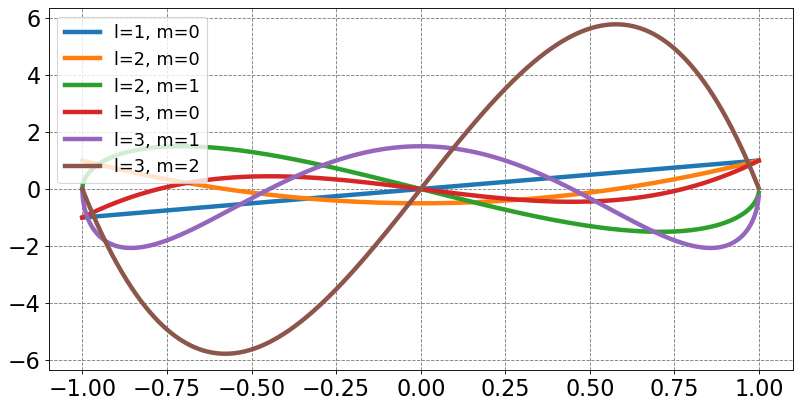

In [1]:
# plot of some of the Legendre polynomials
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import lpmv
x = np.arange(-1,1,0.001)
plt.figure(figsize=(12,6),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
for l in range(4):
    for m in range(l):
        label = "l=" + str(l) + ", m=" + str(m)
        plt.plot(x,lpmv(m,l,x),lw=4,label=label)
plt.legend(fontsize=16);

### Combining Solutions to $\theta$ and $\phi$

The total wavefunctions are the product of $\Phi(\phi)$ and $\Theta(\theta)$.  It is easy to see

$Y_l^m(\theta,\phi)\propto P_l^{|m|}(\cos\theta)e^{im\phi}$.

These are the spherical harmonics. We will now look at some of these.

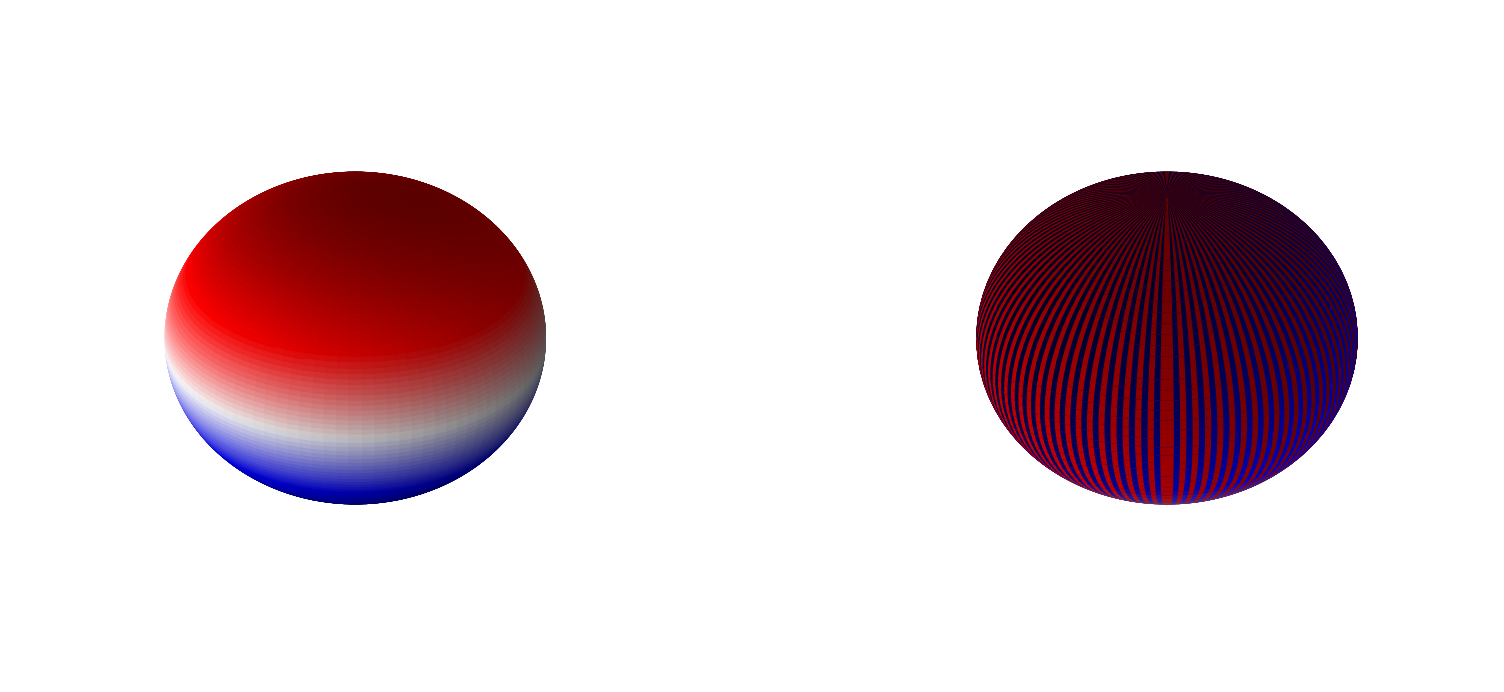

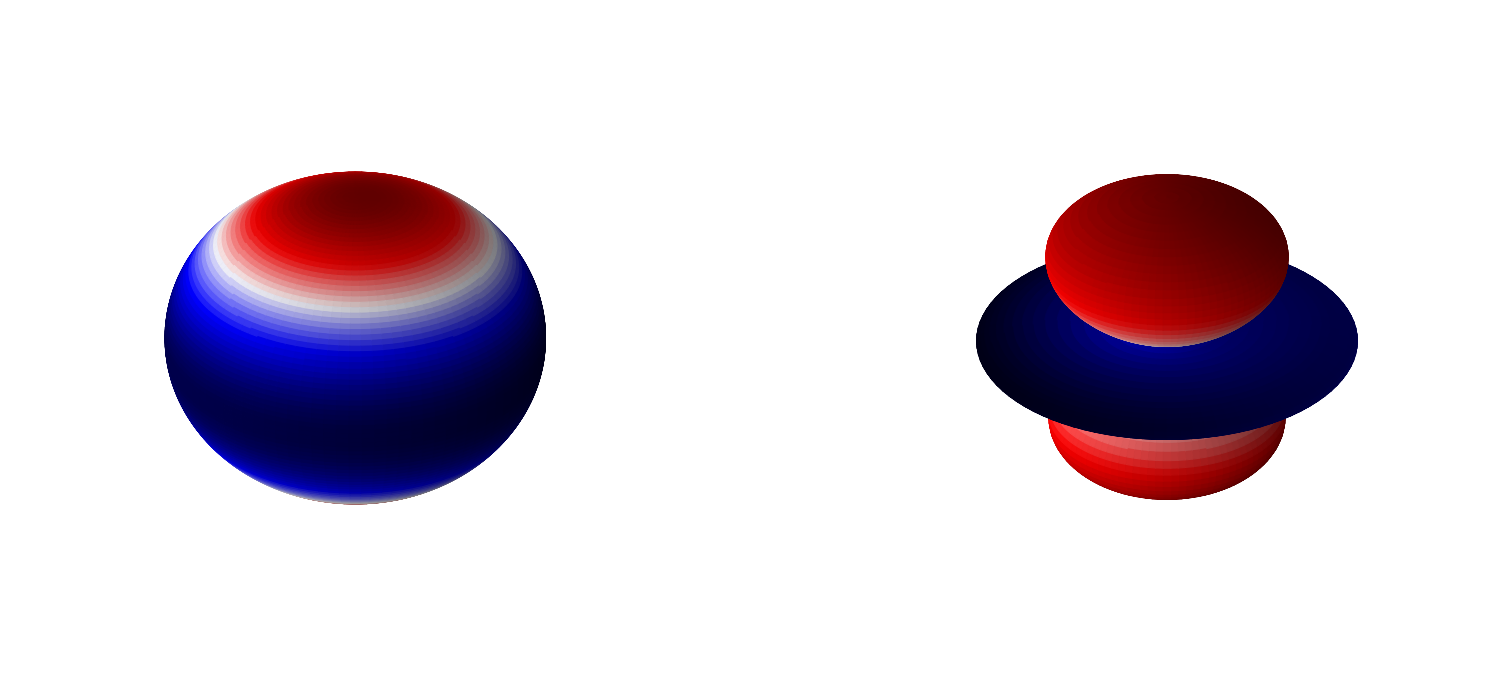

In [2]:
# make two plots of the same spherical harmonic
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
%matplotlib inline
from scipy.special import sph_harm
def plot_spherical_harmonic(m,l,theta=np.linspace(0,np.pi,100),phi=np.linspace(0,2*np.pi,100)):
    THETA, PHI = np.meshgrid(theta, phi)
    X = np.sin(THETA) * np.cos(PHI)
    Y = np.sin(THETA) * np.sin(PHI)
    Z = np.cos(THETA)
    # Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
    fcolors = sph_harm(m, l, PHI, THETA).real
    s = sph_harm(m, l, PHI, THETA).real
    s /= s.max()
    fmax, fmin = fcolors.max(), fcolors.min()
    fcolors = (fcolors - fmin)/(fmax - fmin)
    

    # Set the aspect ratio to 1 so our sphere looks spherical
    fig = plt.figure(figsize=(24,12),dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X, Y, Z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
    ax.set_axis_off()
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(X*s, Y*s, Z*s,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
    # Turn off the axis planes
    ax.set_axis_off()
    plt.show();
plot_spherical_harmonic(0,1)
plot_spherical_harmonic(0,2);

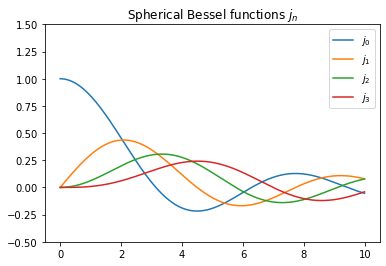

In [3]:
import matplotlib.pyplot as plt
from scipy.special import spherical_jn
x = np.arange(0.0, 10.0, 0.01)
fig, ax = plt.subplots()
ax.set_ylim(-0.5, 1.5)
ax.set_title(r'Spherical Bessel functions $j_n$')
for n in np.arange(0, 4):
    ax.plot(x, spherical_jn(n, x), label=rf'$j_{n}$')
plt.legend(loc='best')
plt.show()

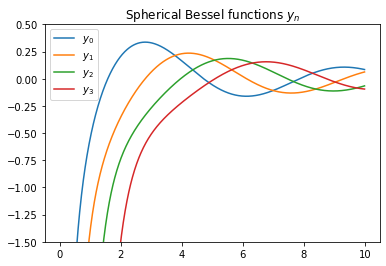

In [4]:
import matplotlib.pyplot as plt
from scipy.special import spherical_yn
x = np.arange(0.0, 10.0, 0.01)
fig, ax = plt.subplots()
ax.set_ylim(-1.5, 0.5)
ax.set_title(r'Spherical Bessel functions $y_n$')
for n in np.arange(0, 4):
    ax.plot(x, spherical_yn(n, x), label=rf'$y_{n}$')
plt.legend(loc='best')
plt.show()